# Practical Machine Learning Assignment #3

## CIFAR-10

##### Importing libraries

In [1]:
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, Input,     MaxPooling2D, Reshape, ZeroPadding2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns; sns.set()
from keras.optimizers import SGD

Using TensorFlow backend.


##### Fetching the data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Getting a feel of the data

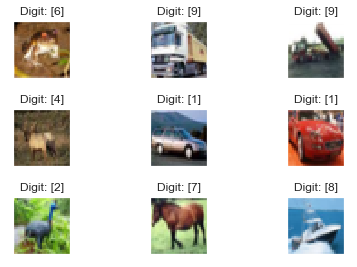

In [3]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

We need this for later

In [4]:
num_labels = len(np.unique(y_train))
img_cols = x_train.shape[1]
img_rows = x_train.shape[2]

##### One hot encoding the target

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

##### Shaping the predictors

In [6]:
x_train = np.reshape(x_train, [x_train.shape[0], img_cols, img_rows, 3]).astype('float32') / 255
x_test = np.reshape(x_test, [x_test.shape[0], img_cols, img_rows, 3]).astype('float32') / 255
input_shape = (img_cols, img_rows, 3)
filters = 128

Callbacks

In [7]:
early_stopping = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=True)
check_point = ModelCheckpoint('cifar_model.h5', save_best_only=True)

We will randomly pick from these

In [8]:
activations = ['elu', 'selu', 'relu']
output_activations = ['softmax', 'softplus']

##### Functions

In [9]:
def random_activation(n):
    return [activations[turtle] for turtle in np.random.randint(0, 3, n)]

In [10]:
def random_activation_output():
    return np.random.choice(output_activations)

In [11]:
def random_neuron(n):
    return np.random.randint(20, 50, n)

In [12]:
def train_model():

    histories = pd.DataFrame()

    for i in range(1_000):
        parameters = []

        drop_rate = np.random.uniform(4e-1, 7e-1)
        learn_rate = np.random.uniform(0.0005, 0.005)
        neurons_1, neurons_2, neurons_3 = random_neuron(3)
        batch_size = int(np.round(np.random.uniform(8, 96)))

        activation_1, activation_2, activation_3 = random_activation(3)
        output_activation = random_activation_output()

        input_1 = Input(shape=input_shape)
        conv2_1 = Conv2D(neurons_1, kernel_size=(3, 3), activation=activation_1)(input_1)
        conv2_2 = Conv2D(neurons_2*2, (3, 3), activation=activation_2)(conv2_1)
        max_1 = MaxPooling2D(pool_size=(3, 3))(conv2_2)
        drop_1 = Dropout(drop_rate)(max_1)
        flat_1 = Flatten()(drop_1)
        dense_1 = Dense(neurons_3*3, activation=activation_3)(flat_1)

        outputs = Dense(1_0, activation=output_activation)(dense_1)

        inputs = input_1

        model = Model(inputs=inputs, outputs=outputs)

        model.compile(loss='categorical_crossentropy',
                      optimizer=Adam(lr=learn_rate),
                      metrics=['accuracy'])

        model.fit(x_train,
                  y_train,
                  validation_split=2e-1,
                  epochs=5,
                  batch_size=batch_size,
                  callbacks=[early_stopping, check_point],
                  verbose=0)

        score = model.evaluate(x_test,
                               y_test,
                               batch_size=batch_size,
                               verbose=0)

        parameters.append(score[1])
        parameters.append(batch_size)
        parameters.append(drop_rate)
        parameters.append(learn_rate)
        parameters.append(neurons_1)
        parameters.append(neurons_2*2)
        parameters.append(neurons_3*3)
        parameters.append(activation_1)
        parameters.append(activation_2)
        parameters.append(activation_3)
        parameters.append(output_activation)

        df = pd.DataFrame(parameters, index=['best_acc', 'batch_size', 'drop_rate', 'learn_rate', 'neurons_1',
                                             'neurons_2', 'neurons_3', 'activation_1', 'activation_2',
                                             'activation_3', 'output_activation'], columns=[i]).T
        histories = pd.concat([histories, df], axis=0, sort=False)
        print('Iteration', str(i+1), 'accuracy: ', str(score[1]), '-->', parameters[1:])
        histories.to_csv('C:/Users/Nicolas/Documents/Scraping/cifar_histories_full.csv', index=None)
    return histories

##### Running the whole thing

In [13]:
# params = train_model().sort_values(by='best_acc', ascending=False)

##### Loading the CSV of the various random models

In [14]:
df = pd.read_csv('C:/Users/Nicolas/Documents/Scraping/cifar_histories_full.csv')
df = df.sort_values(by='best_acc', ascending=False).reset_index(drop=True)

In [15]:
df.head()

,best_acc,batch_size,drop_rate,learn_rate,neurons_1,neurons_2,neurons_3,activation_1,activation_2,activation_3,output_activation
0,0.7070,24,0.556703,0.001071,33,98,138,relu,relu,relu,softmax
1,0.7034,47,0.504019,0.000935,39,80,108,selu,elu,relu,softplus
2,0.6955,77,0.511836,0.002312,44,86,78,relu,elu,elu,softplus
3,0.6922,85,0.498348,0.001625,27,98,147,selu,relu,elu,softmax
4,0.6893,62,0.554180,0.000903,40,84,144,elu,elu,relu,softplus


It's interesting to notice that the best model only has *relu* activations

##### Visualizing the parameter optimization

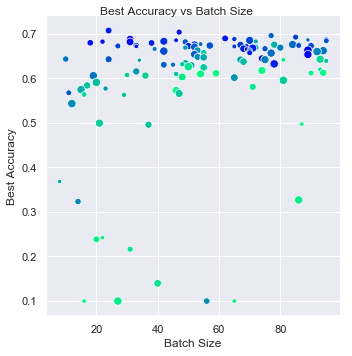

In [16]:
g = sns.relplot(data=df, x='batch_size', y='best_acc', kind='scatter', size='drop_rate', 
                 legend=False, hue='learn_rate', palette='winter')
g.fig.suptitle('Best Accuracy vs Batch Size')
g.set(xlabel='Batch Size', ylabel='Best Accuracy')

There doesn't seem to be a relationship between batch size and accuracy... there may be a relationship between learning rate and accuracy, as we can see by the concentration of blue points on top. Let's look at this in more detail

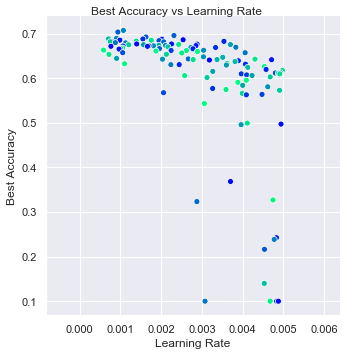

In [17]:
g = sns.relplot(data=df, x='learn_rate', y='best_acc', kind='scatter', 
                 legend=False, hue='drop_rate', palette='winter')
g.fig.suptitle('Best Accuracy vs Learning Rate')
g.set(xlabel='Learning Rate', ylabel='Best Accuracy')

Seems like I was using learning rates that were slightly too high. The best accuracy falls pretty quickly with larger learning rates

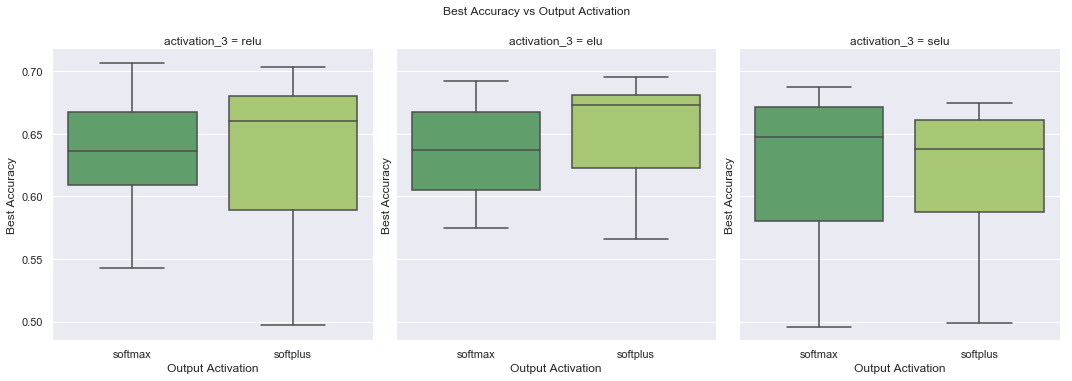

In [18]:
g = sns.catplot(data=df, x='output_activation', y='best_acc', kind='box', showfliers=False, 
                col='activation_3', palette='summer')
g.fig.suptitle('Best Accuracy vs Output Activation', y=1.05)
g.set(xlabel='Output Activation', ylabel='Best Accuracy')

Here we can see that the median best accuracy is higher for softplus in two cases, but the highest best accuracy is better for softmax also in two cases. The absolute best is at the left completely, the third activation being relu, and the output activation being softmax.

(0.45, 0.72)

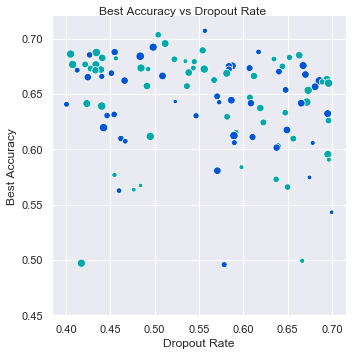

In [19]:
g = sns.relplot(data=df, x='drop_rate', y='best_acc', kind='scatter', palette='winter', 
                hue='output_activation', size='batch_size', legend=None)
g.fig.suptitle('Best Accuracy vs Dropout Rate')
g.set(xlabel='Dropout Rate', ylabel='Best Accuracy')
plt.ylim(45e-2, 72e-2)

There doesn't seem to be a pattern here. If there is one, I don't see it

##### Evaluating the best model

In [20]:
best_model = df.head(1)
best_model

,best_acc,batch_size,drop_rate,learn_rate,neurons_1,neurons_2,neurons_3,activation_1,activation_2,activation_3,output_activation
0,0.707,24,0.556703,0.001071,33,98,138,relu,relu,relu,softmax


Building the model

In [21]:
drop_rate = best_model['drop_rate'].values[0]
learn_rate = best_model['learn_rate'].values[0]
neurons_1, neurons_2, neurons_3 = best_model[['neurons_1', 'neurons_2', 'neurons_3']].values[0]
batch_size = best_model['batch_size'].values[0]
activation_1, activation_2, activation_3 = best_model[['activation_1', 
                                                       'activation_2', 'activation_3']].values[0]
output_activation = best_model['output_activation'].values[0]

input_1 = Input(shape=input_shape)
conv2_1 = Conv2D(neurons_1, kernel_size=(3, 3), activation=activation_1)(input_1)
conv2_2 = Conv2D(neurons_2, (3, 3), activation=activation_2)(conv2_1)
max_1 = MaxPooling2D(pool_size=(3, 3))(conv2_2)
drop_1 = Dropout(drop_rate)(max_1)
flat_1 = Flatten()(drop_1)
dense_1 = Dense(neurons_3, activation=activation_3)(flat_1)

outputs = Dense(1_0, activation=output_activation)(dense_1)

inputs = input_1

model = Model(inputs=inputs, outputs=outputs)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Compiling the model

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=learn_rate),
              metrics=['accuracy'])

Training the model

In [23]:
history = model.fit(x_train,
                    y_train,
                    validation_split=2e-1,
                    epochs=1_00,
                    batch_size=batch_size,
                    callbacks=[early_stopping, check_point])

Train on 40000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
40000/40000 [==============================] - 28s 712us/sample - loss: 1.3864 - acc: 0.5050 - val_loss: 1.1085 - val_acc: 0.6206
Epoch 2/100
40000/40000 [==============================] - 26s 646us/sample - loss: 1.0538 - acc: 0.6288 - val_loss: 0.9521 - val_acc: 0.6707
Epoch 3/100
40000/40000 [==============================] - 26s 662us/sample - loss: 0.9291 - acc: 0.6737 - val_loss: 0.8702 - val_acc: 0.6978
Epoch 4/100
40000/40000 [==============================] - 26s 655us/sample - loss: 0.8336 - acc: 0.7070 - val_loss: 0.8786 - val_acc: 0.6941
Epoch 5/100
40000/40000 [==============================] - 26s 645us/sample - loss: 0.7508 - acc: 0.7330 - val_loss: 0.8506 - val_acc: 0.7044
Epoch 6/100
40000/40000 [==============================] - 26s 645us/sample - loss: 0.6916 - acc: 0.7547 - val_loss: 0.8219 - val_acc: 0.7223
Epoch 7/100
40000/40000 [=========================

Evaluating the model

In [24]:
score = model.evaluate(x_test,
                       y_test,
                       batch_size=batch_size,
                       verbose=1)

10000/10000 [==============================] - 2s 201us/sample - loss: 0.8867 - acc: 0.7163


In [25]:
print('The best model has a test accuracy of %i%%'%np.round(score[1]*100))

The best model has a test accuracy of 72%


##### Plotting the metrics

Accuracy

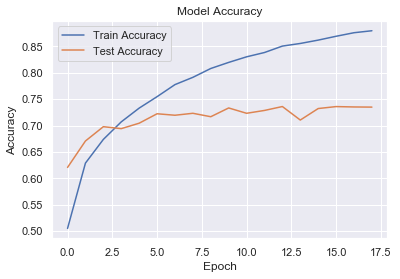

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

Loss

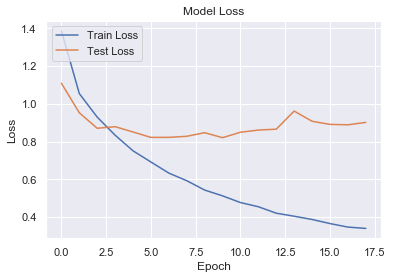

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Test Loss'], loc='upper left')
plt.show()

##### Removing the max pooling layer

Building the model

In [28]:
drop_rate = best_model['drop_rate'].values[0]
learn_rate = best_model['learn_rate'].values[0]
neurons_1, neurons_2, neurons_3 = best_model[['neurons_1', 'neurons_2', 'neurons_3']].values[0]
batch_size = best_model['batch_size'].values[0]
activation_1, activation_2, activation_3 = best_model[['activation_1', 
                                                       'activation_2', 'activation_3']].values[0]
output_activation = best_model['output_activation'].values[0]

input_1 = Input(shape=input_shape)
conv2_1 = Conv2D(neurons_1, kernel_size=(3, 3), activation=activation_1)(input_1)
conv2_2 = Conv2D(neurons_2, (3, 3), activation=activation_2)(conv2_1)
drop_1 = Dropout(drop_rate)(conv2_2)
flat_1 = Flatten()(drop_1)
dense_1 = Dense(neurons_3, activation=activation_3)(flat_1)

outputs = Dense(1_0, activation=output_activation)(dense_1)

inputs = input_1

model = Model(inputs=inputs, outputs=outputs)

Compiling the model

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=learn_rate),
              metrics=['accuracy'])

Training the model

In [30]:
history = model.fit(x_train,
                    y_train,
                    validation_split=2e-1,
                    epochs=1_00,
                    batch_size=batch_size,
                    callbacks=[early_stopping, check_point])

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 69s 2ms/sample - loss: 1.4474 - acc: 0.4802 - val_loss: 1.2212 - val_acc: 0.5712
Epoch 2/100
40000/40000 [==============================] - 68s 2ms/sample - loss: 1.0758 - acc: 0.6198 - val_loss: 1.1447 - val_acc: 0.5955
Epoch 3/100
40000/40000 [==============================] - 69s 2ms/sample - loss: 0.8687 - acc: 0.6944 - val_loss: 1.0236 - val_acc: 0.6462
Epoch 4/100
40000/40000 [==============================] - 68s 2ms/sample - loss: 0.6974 - acc: 0.7541 - val_loss: 1.0009 - val_acc: 0.6687
Epoch 5/100
40000/40000 [==============================] - 67s 2ms/sample - loss: 0.5481 - acc: 0.8059 - val_loss: 1.0903 - val_acc: 0.6552
Epoch 6/100
40000/40000 [==============================] - 67s 2ms/sample - loss: 0.4494 - acc: 0.8411 - val_loss: 1.1639 - val_acc: 0.6506
Epoch 7/100
40000/40000 [==============================] - 67s 2ms/sample - loss: 0.3704 - acc: 0.8681 - val_l

Evaluating the model

In [31]:
score = model.evaluate(x_test,
                       y_test,
                       batch_size=batch_size,
                       verbose=1)

10000/10000 [==============================] - 2s 246us/sample - loss: 1.0253 - acc: 0.6546


In [32]:
print('The best model has a test accuracy of %i%%'%np.round(score[1]*100))

The best model has a test accuracy of 65%


##### Plotting the metrics

Accuracy

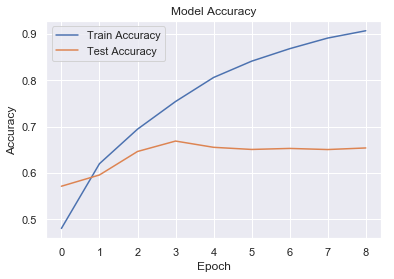

In [33]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

Loss

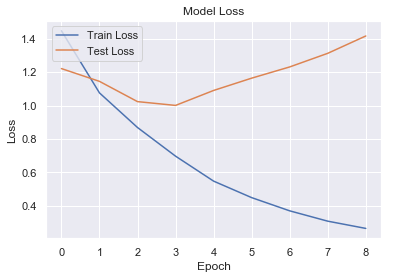

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Test Loss'], loc='upper left')
plt.show()